In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flipkart-product-customer-reviews-dataset/Dataset-SA.csv


In [22]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
import numpy as np
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...

[nltk_data]   Package stopwords is already up-to-date!


In [23]:
data = pd.read_csv("/kaggle/input/flipkart-product-customer-reviews-dataset/Dataset-SA.csv")

In [24]:
data.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [25]:
data.shape

(205052, 6)

In [26]:
data.isna().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [27]:
data["Review"].fillna("", inplace=True)
data.dropna(inplace=True)
data["Summary"].fillna("No summary available", inplace=True)

In [28]:
data.isna().sum()

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64

In [29]:
# Remove unnecessary columns
data = data.drop(["product_name", "product_price", "Review"], axis=1)

In [30]:
# Clean the text data
def clean_text(text):
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stopwords.words("english")]
    text = " ".join(text)
    return text
 
data["Summary"] = data["Summary"].apply(clean_text)   

In [31]:
data

,Rate,Summary,Sentiment
0,5,great cooler excellent air flow price amazing ...,positive
1,5,best budget fit cooler nice cooling,positive
2,3,quality good power air decent,positive
3,1,bad product fan,negative
4,3,ok ok product,neutral
...,...,...,...
205047,5,good product,positive
205048,5,nice,positive
205049,3,nice fast delivery,positive
205050,5,awesome product,positive


In [35]:
# Convert text data to numerical data
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(data["Summary"].values)

maxlen = 30
X = tokenizer.texts_to_sequences(data["Summary"].values)
X_padded = np.zeros((len(X), maxlen))

for i, seq in enumerate(X):
    if len(seq) > maxlen:
        seq = seq[:maxlen]
    X_padded[i, :len(seq)] = seq

y = pd.get_dummies(data["Sentiment"]).values

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
X = np.array(X_padded)
model = Sequential()
model.add(Embedding(5000, 128, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10



Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.

Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert



Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.

Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert

4101/4101 [==============================] - ETA: 0s - loss: 0.4539 - accuracy: 0.8447


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7f52c2e60280>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: lineno is out of bounds

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert



Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7f52c2e60280>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: lineno is out of bounds

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert

4101/4101 [==============================] - 596s 144ms/step - loss: 0.4539 - accuracy: 0.8447 - val_loss: 0.4748 - val_accuracy: 0.8186

Epoch 2/10

4101/4101 [==============================] - 578s 141ms/step - loss: 0.3718 - accuracy: 0.8688 - val_loss: 0.2694 - val_accuracy: 0.9124

Epoch 3/10

4101/4101 [==============================] - 569s 139ms/step - loss: 0.2565 - accuracy: 0.9178 - val_loss: 0.2541 - val_accuracy: 0.9145

Epoch

In [42]:
score, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy:", accuracy)

1282/1282 [==============================] - 27s 21ms/step - loss: 0.2611 - accuracy: 0.9206

Test Accuracy: 0.9205540418624878


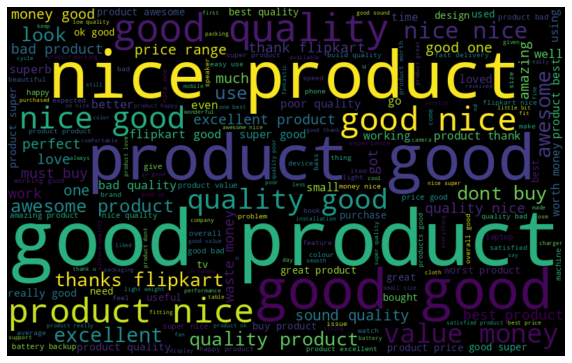

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words = " ".join(data["Summary"].values)
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()